In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../datasets/usedcars.csv")
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [2]:
y_data = df["price"]
x_data = df.drop("price", axis=1)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.10, random_state=1
)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(
    x_train[
        [
            "horsepower",
            "curb-weight",
            "engine-size",
            "highway-mpg",
            "normalized-losses",
            "symboling",
        ]
    ]
)
x_test_pr = pr.fit_transform(
    x_test[
        [
            "horsepower",
            "curb-weight",
            "engine-size",
            "highway-mpg",
            "normalized-losses",
            "symboling",
        ]
    ]
)

In [7]:
from sklearn.linear_model import Ridge

RigeModel = Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

print("predicted:", yhat[0:4])
print("test set :", y_test[0:4].values)

predicted: [ 9514.3818699   6672.42344634 10534.19951249  5506.01891856]
test set : [ 9549.  6229. 10245.  7295.]


In [10]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(
        x_train_pr, y_train
    )

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:04<00:00, 210.05it/s, Test Score=0.682, Train Score=0.858]


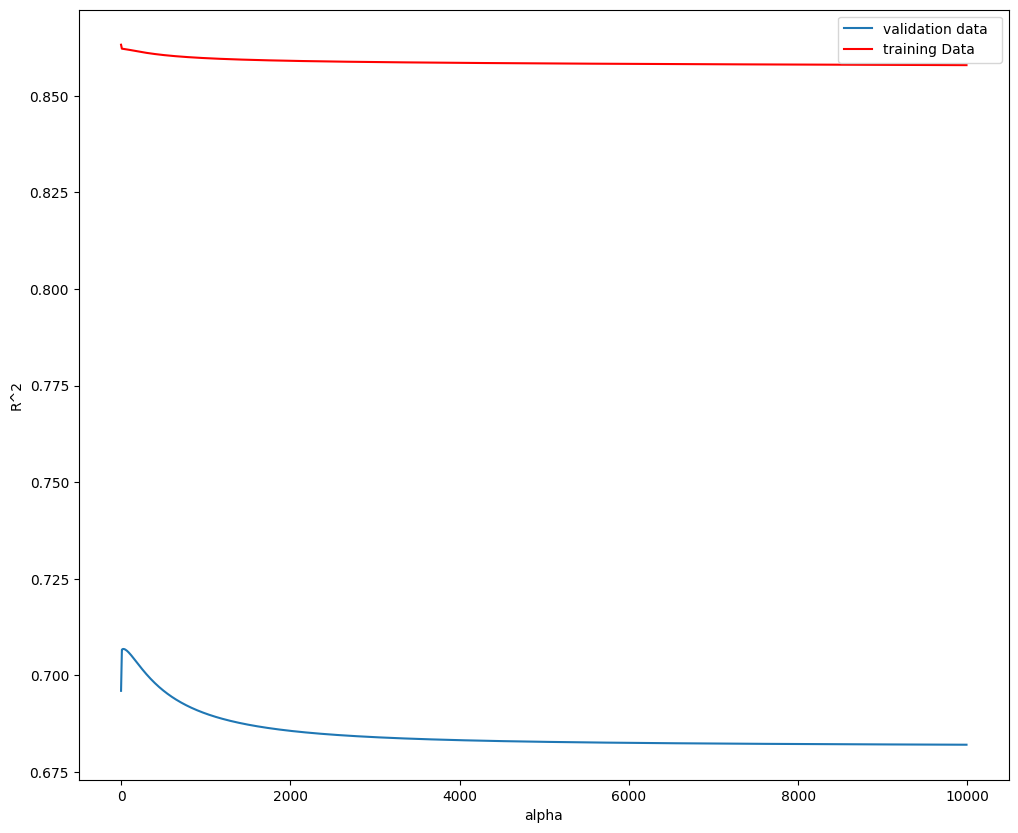

In [11]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label="validation data  ")
plt.plot(Alpha, Rsqu_train, "r", label="training Data ")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()

In [12]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7066579427639844

In [13]:
from sklearn.model_selection import GridSearchCV

parameters1 = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_data)
BestRR = Grid1.best_estimator_

BestRR.score(
    x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_test
)

0.6373308904159383

In [14]:
parameters2 = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_data)
best_alpha = Grid2.best_params_["alpha"]
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(
    x_data[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_data
)

Ridge(alpha=10000)